### Regression for altitude values

In [16]:
import pandas as pd
import numpy as np

##### Load data from xls files
Return *X* values of shape (100, 11) and *y* shape (100, 1).
*X* correspond to 11 bands (700, 705, 710, 725, 740, 750, 820, 840, 870, 876, 892) of 100 samples (all transects).

*y* correspond to altitude of the samples.


In [404]:
def load_data(filename="data/data_x01.xlsx"):
    transectas = ['transecta_F', 'transecta_E', 'transecta_B', 'transecta_C', 'transecta_D']
    appended_df = pd.DataFrame(columns=[])
    for transecta in transectas:
        df = pd.read_excel(filename, sheetname=transecta)
        df = df.iloc[1:]
        df = df.transpose()
        df.columns = df.iloc[0]
        df = df.iloc[1:]
        df = df.dropna(axis=1)
        # print(df.columns)
        df2 = df.copy()
        appended_df = appended_df.append([df2])

    appended_df.columns.name = 'Puntos'
    # print(appended_df)
    y = appended_df.iloc[:, -1].values
    X = appended_df.iloc[:, :-1].values
    
    return X, y 

In [405]:
X, y = load_data("data/data_x3.xlsx")
assert X.shape == (100, 11) and y.shape == (100,)
print(X, y)

[[12692.0 13385.0 13865.0 ... 14611.0 14063.0 14391.0]
 [11598.0 12544.0 12551.0 ... 8576.0 7523.0 7200.0]
 [11235.0 11637.0 11905.0 ... 5902.0 5511.0 5463.0]
 ...
 [9878.0 10032.0 10401.0 ... 4777.0 4581.0 4425.0]
 [11518.0 12099.0 12500.0 ... 7385.0 6733.0 6741.0]
 [11066.0 11854.0 12037.0 ... 5861.0 5515.0 5247.0]] [4.51344 4.51344 4.34834 4.18328 4.18328 4.01821 3.85315 3.85315 3.68809
 3.52309 3.35802 3.35802 3.19296 3.0279 2.86284 2.69777 2.69777 2.45919
 4.34834 2.29412 4.51344 4.34831 4.34831 4.18319 4.18319 4.01806 4.01806
 3.85298 3.68792 3.52285 3.52285 3.35779 3.19279 3.02772 2.86266 2.86266
 2.6976 2.53254 2.43784 2.28407 4.11813 3.953 3.78788 3.49438 3.24886
 3.15723 3.06561 2.88236 2.79073 2.6558 2.56417 3.62275 2.542 3.34048
 2.542 2.542 2.542 3.15723 2.97398 3.953 4.41469 4.41469 4.24957 3.93055
 3.93055 3.71055 3.61892 3.0223 2.69217 2.36205 3.80217 3.71055 3.5273
 3.43567 3.27281 2.85723 2.52711 2.52711 2.35577 2.35577 4.55674 4.55674
 3.8593 3.8593 3.69423 3.52917 3

#### PCA over the dataset for  introspection

Percentage of variance explained by each PC [0.97360403 0.01826385 0.00272005]


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


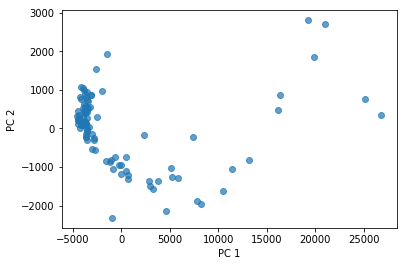

In [423]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X)
Xp = pca.transform(X)
print("Percentage of variance explained by each PC %s" %(pca.explained_variance_ratio_))
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.7)
plt.legend(loc="best")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

##### Run metrics for all the neighborhoods's sizes
Default 3-fold cross validation using $r^2$ (mean and std)

In [352]:
neighborhoods = ["data_x01.xlsx", "data_x3.xlsx", "data_x5.xlsx", "data_x7.xlsx"]

An extremely randomized tree regressor.
Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.(http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html#sklearn.tree.ExtraTreeRegressor)

In [437]:
from sklearn.model_selection import cross_val_score

for n in neighborhoods:
    X, y = load_data('data/' + n)
    # pca = PCA(n_components=4).fit(X)
    # Xp = pca.transform(X)
    reg_tree = ExtraTreesRegressor()
    scores = cross_val_score(reg_tree, X, y, cv=3)
    print("Accuracy for data %s: %0.2f (+/- %0.2f)" % (n, scores.mean(), scores.std() * 2))

Accuracy for data data_x01.xlsx: 0.73 (+/- 0.21)
Accuracy for data data_x3.xlsx: 0.81 (+/- 0.01)
Accuracy for data data_x5.xlsx: 0.82 (+/- 0.03)
Accuracy for data data_x7.xlsx: 0.82 (+/- 0.03)


In [375]:
def plot_importances(reg_tree):
    importances = reg_tree.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in reg_tree.estimators_],
    #         axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    fig = plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    
    return fig

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
Feature ranking:
1. feature 1 (0.319288)
2. feature 2 (0.175631)
3. feature 10 (0.093800)
4. feature 5 (0.090551)
5. feature 3 (0.068868)
6. feature 0 (0.058331)
7. feature 7 (0.051780)
8. feature 9 (0.050946)
9. feature 4 (0.041794)
10. feature 6 (0.027789)
11. feature 8 (0.021223)


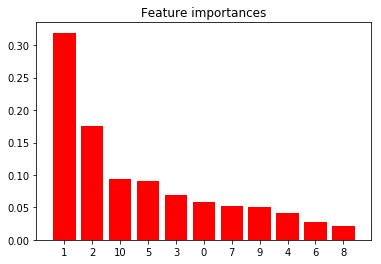

0.8032820926679116

In [376]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

X, y = load_data('data/data_x3.xlsx')
reg_tree = ExtraTreesRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(reg_tree.fit(X_train, y_train))
plot_importances(reg_tree)
plt.show()
r2_score(y_test, reg_tree.predict(X_test))

### SVR

Epsilon-Support Vector Regression using kernel rbf (http://scikit-learn.org/stable/modules/svm.html#svm-regression)

In [380]:
import time
from sklearn.svm import SVR

for n in neighborhoods:
    X, y = load_data('data/' + n)
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
    scores = cross_val_score(svr, X, y, cv=3)
    print("Accuracy for data %s: %0.2f (+/- %0.2f)" % (n, scores.mean(), scores.std() * 2))

Accuracy for data data_x01.xlsx: -0.22 (+/- 0.31)
Accuracy for data data_x3.xlsx: -0.22 (+/- 0.30)
Accuracy for data data_x5.xlsx: -0.22 (+/- 0.31)
Accuracy for data data_x7.xlsx: -0.22 (+/- 0.31)


##### Multiple Linear Regression
$\hat{y}$ is the predicted value:

$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$

the vector $w = (w_1,\cdots, w_p)$ as *coef_* and $w_0$ as *intercept_*

from the docs (http://scikit-learn.org/stable/modules/linear_model.html)

In [399]:
for n in neighborhoods:
    X, y = load_data('data/' + n)
    reg = linear_model.LinearRegression(fit_intercept=True)
    scores = cross_val_score(reg, X, y, cv=3)
    print("Accuracy for data %s: %0.2f (+/- %0.2f)" % (n, scores.mean(), scores.std() * 2))

Accuracy for data data_x01.xlsx: 0.49 (+/- 0.37)
Accuracy for data data_x3.xlsx: 0.25 (+/- 0.30)
Accuracy for data data_x5.xlsx: -0.01 (+/- 0.22)
Accuracy for data data_x7.xlsx: 0.06 (+/- 0.71)


##### TheilSenRegressor
Theil-Sen Estimator: robust multivariate regression model.
The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions. (http://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html#sphx-glr-auto-examples-linear-model-plot-theilsen-py)


In [401]:
from sklearn.linear_model import TheilSenRegressor

for n in neighborhoods:
    X, y = load_data('data/' + n)
    tsr = TheilSenRegressor(random_state=42)
    scores = cross_val_score(tsr, X, y, cv=3)
    print("Accuracy for data %s: %0.2f (+/- %0.2f)" % (n, scores.mean(), scores.std() * 2))


Accuracy for data data_x01.xlsx: 0.43 (+/- 0.56)
Accuracy for data data_x3.xlsx: -0.56 (+/- 0.83)
Accuracy for data data_x5.xlsx: -1.35 (+/- 2.65)
Accuracy for data data_x7.xlsx: -1.12 (+/- 1.11)


##### Lasso

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. (http://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)


In [403]:
from sklearn.linear_model import Lasso

for n in neighborhoods:
    X, y = load_data('data/' + n)
    lasso = Lasso(alpha=10.)
    scores = cross_val_score(lasso, X, y, cv=3)
    print("Accuracy for data %s: %0.2f (+/- %0.2f)" % (n, scores.mean(), scores.std() * 2))

Accuracy for data data_x01.xlsx: 0.56 (+/- 0.27)
Accuracy for data data_x3.xlsx: 0.53 (+/- 0.23)
Accuracy for data data_x5.xlsx: 0.42 (+/- 0.16)
Accuracy for data data_x7.xlsx: 0.48 (+/- 0.32)
